# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



In [4]:
import csv
class_id_sign_name = {}
with open('signnames.csv', newline='') as csvfile:
     reader = csv.DictReader(csvfile)
     for row in reader:
         class_id_sign_name.update({row['ClassId']: row['SignName']})

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(class_id_sign_name)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

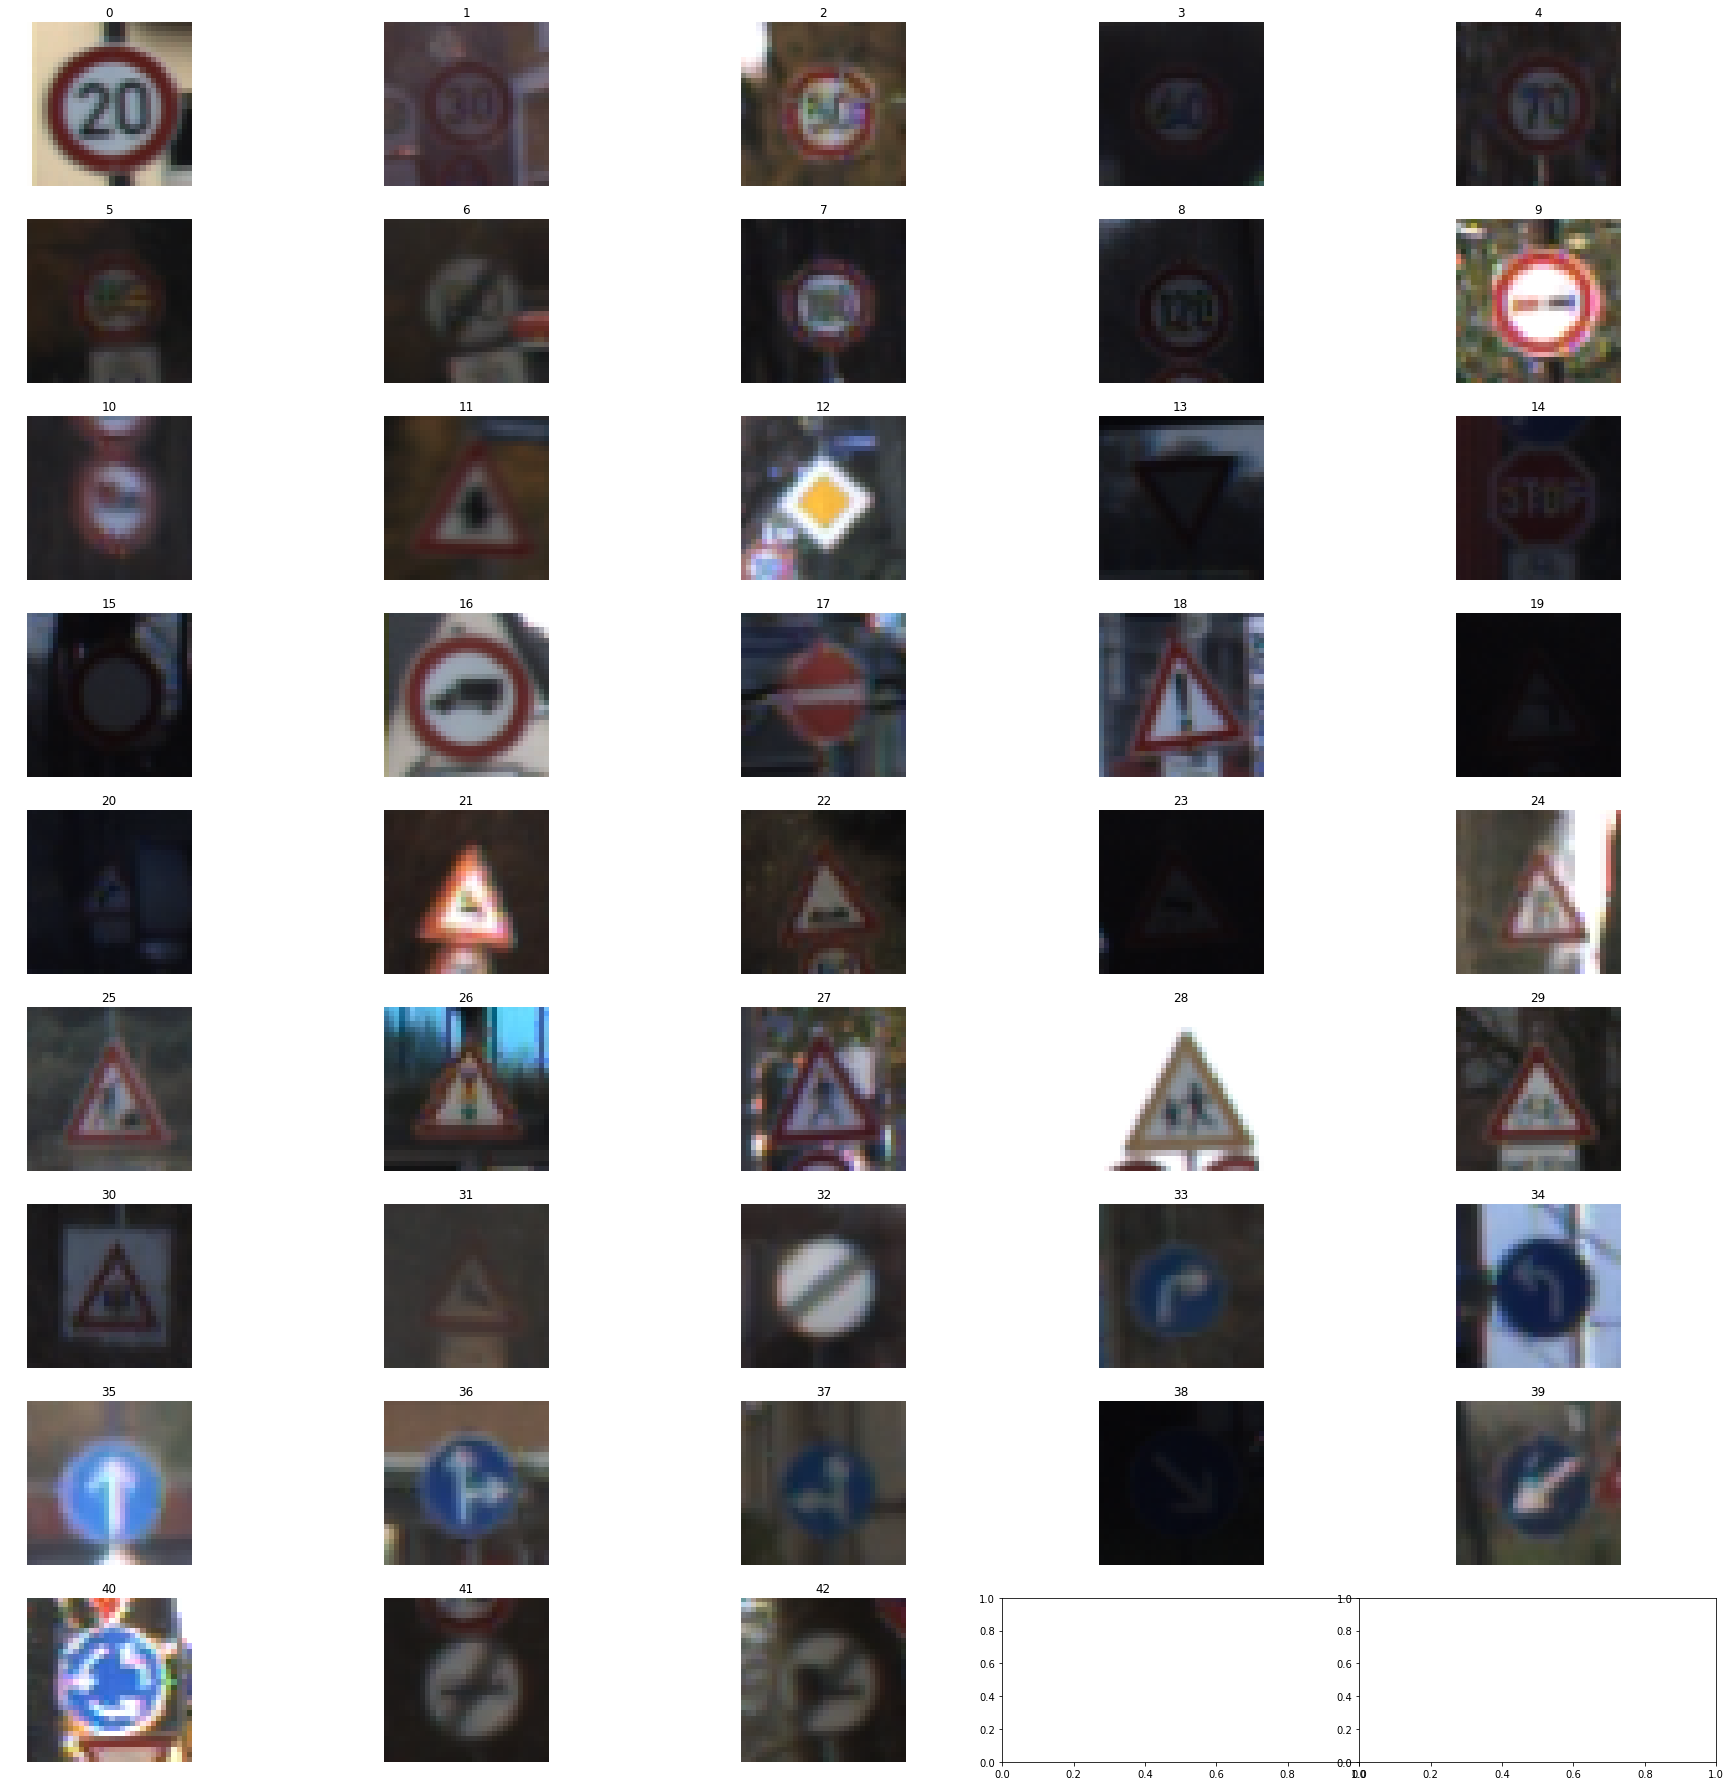

In [21]:
import random
import numpy as np
# show one image from each class
fig, axs = plt.subplots(9,5, figsize=image_shape)
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(n_classes):
    index = np.where(y_train == i)
    # get the picture from class i
    image = X_train[index[0][0]]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(i)

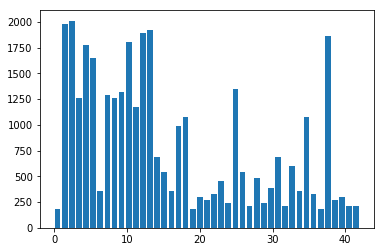

In [12]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

# Question 1

Describe how you preprocessed the data. Why did you choose that technique?

My dataset preprocessing consisted of:
Converting to grayscale - This worked well as described in their traffic sign classification article. It also helps to reduce training time, which was nice when a GPU wasn't available.
Normalizing the data to the range (-1,1) - The reason is finding a singular learning rate is much easier for normalized data.

# convert to grayscale & normalize

In [18]:
import numpy as np
def rgbtogray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

x_train_2d = np.array(X_train, dtype=float)
x_train_2d = (rgbtogray(x_train_2d) - 128) / 128

x_train_float = np.array(X_train, dtype=float)
x_train_float = (np.expand_dims(rgbtogray(x_train_float), axis=3) - 128) / 128

x_valid_float = np.array(X_valid, dtype=float)
x_valid_float = (np.expand_dims(rgbtogray(x_valid_float), axis=3) - 128) / 128

x_test_float = np.array(X_test, dtype=float)
x_test_float = (np.expand_dims(rgbtogray(x_test_float), axis=3) - 128) / 128

## Augment the data set with jittered images

I made a function transform() that transforms the image with angle, scale and offset. 

In [16]:
import scipy.ndimage
import numpy as np
from math import pi, cos, sin

def transform(gray, angle, scale, offset_c_in):
    c_in = 0.5 * np.array(gray.shape) + offset_c_in
    c_out = 0.5 * np.array(gray.shape)
    rot = np.array([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
    invRot = rot.T
    invScale = np.diag(scale)
    invTransform = np.dot(invScale, invRot)
    offset = c_in - np.dot(invTransform, c_out)
    res = scipy.ndimage.interpolation.affine_transform(
        gray, invRot, order=2, offset=offset, output_shape=gray.shape, cval=0.0, output=float
    )
    return res

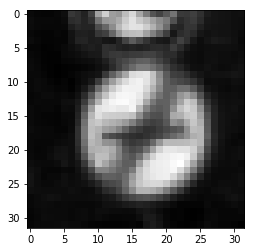

In [22]:
from matplotlib import cm
res = transform(x_train_2d[0], 5 * pi / 180, (0.95, 0.95), (1, -1))
plt.imshow(x_train_2d[0], cmap=cm.gray)

Some category has too few pictures, so use jittered images to make these categories to contain 800 pictures.
The parameters used to generate jittered images:
angle_deg: [-1.5, 1.5]
scale: [0.9375, 1.0675]
offset_pixel: [-2, 2]

In [16]:
from numpy.random import random_sample

n_train_2d = x_train_2d.shape[0]

num_to_add = 0
for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        num_to_add += 800 - n_samples

x_train_ext = np.zeros((n_train_2d + num_to_add, x_train_2d.shape[1], x_train_2d.shape[2]))
y_train_ext = np.zeros((n_train_2d + num_to_add, 1))
for i in range(n_train_2d):
    x_train_ext[i] = x_train_2d[i]
    y_train_ext[i] = y_train[i]                       

out_index = n_train_2d
for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            index = class_indices[0][i%n_samples]
            
            angle = (random_sample() * 3.0 - 1.5) * pi / 180 
            scale_x = random_sample() * 0.125 + 0.9375
            scale = (scale_x, scale_x)
            offset_c_in = (random_sample() * 4.0 - 2.0, random_sample() * 4.0 - 2.0)
            
            new_img = transform(x_train_ext[index], angle, scale, offset_c_in)
            x_train_ext[out_index] = new_img
            y_train_ext[out_index] = class_n
            out_index += 1
x_train_ext = np.expand_dims(x_train_ext, axis=3)
            
print('x, y shapes:', x_train_ext.shape, y_train_ext.shape)

x, y shapes: (46480, 32, 32, 1) (46480, 1)


Every category has at least 800 pictures

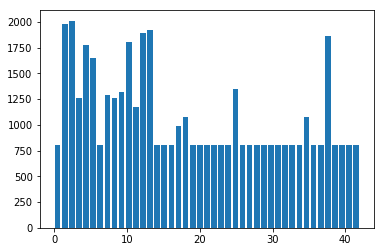

In [17]:
# histogram of label frequency
hist, bins = np.histogram(y_train_ext, bins=n_classes)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [18]:
## Shuffle the training dataset

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

x_train_ext, y_train_ext = shuffle(x_train_ext, y_train_ext)
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_ext, y_train_ext, 
                                                                              test_size=0.20, random_state=42)


In [19]:
y_valid_final = y_valid_final.squeeze()

In [20]:
n_train_final = x_train_final.shape[0]
print("train set size: ", n_train_final)
n_valid_final = x_valid_final.shape[0]
print("valid set size: ", n_valid_final)

train set size:  37184
valid set size:  9296


### Question 2
_Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

Answer:

My model is from the LeCun's traffic sign paper as shown in the image below:
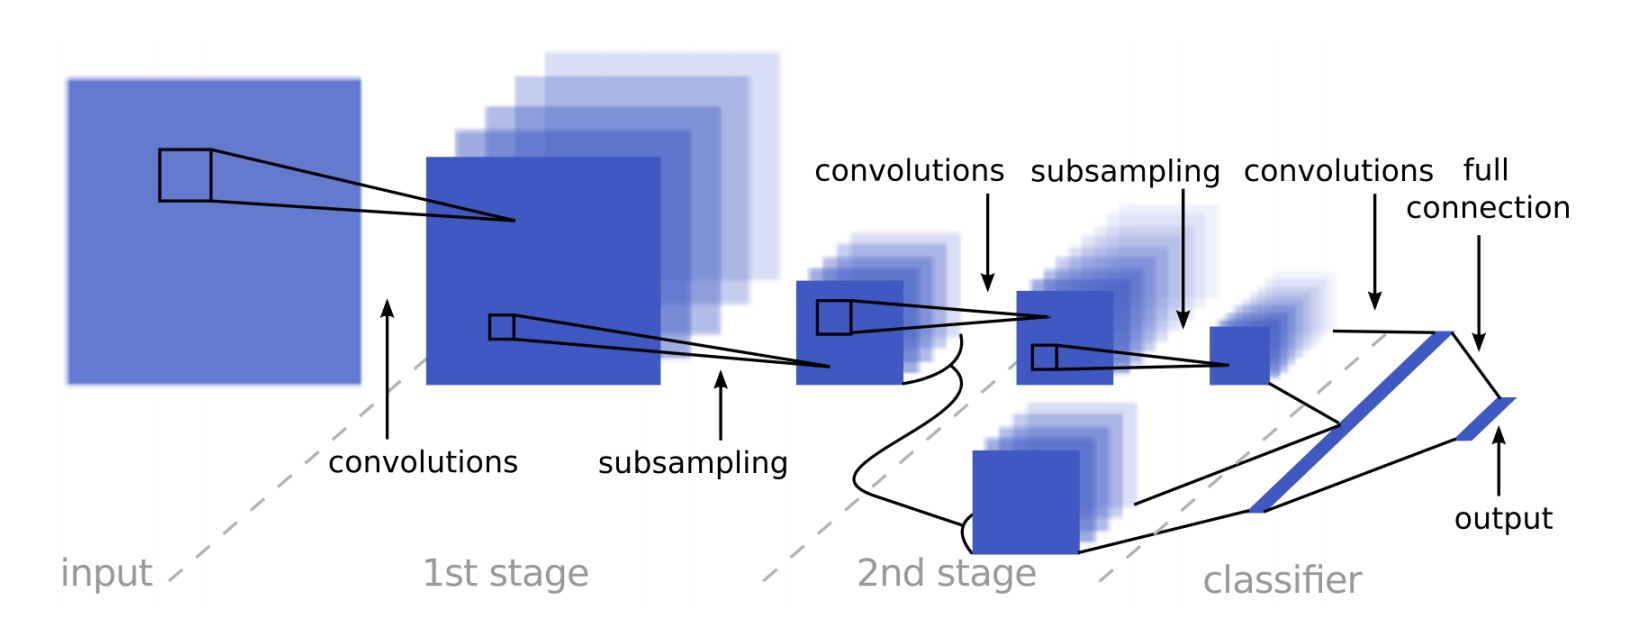


Rumor has it that data augmentation is the single best method to increase accuracy of the model. Because several classes in the data have far fewer samples than others the model will tend to be biased toward those classes with more samples. I implemented augmentation by creating copies of each sample for a class (sometimes several copies) in order to boost the number of samples for the class to 800 (if that class didn't already have at least 800 samples). Each copy is fed into a "jitter" pipeline that randomly translates, scales, warps adjusts the image. 

Then, I used skilearn kit to split the training set into 80%:20%, where 80% as the training set and 20% as the validation set. 
With more training data and validation data, the model's parameter estimates have smaller variance. With less testing data, tne model's performance statistic will have greater variance. Less variance in both cases are good for the model's training.

The parameters used to generate jittered images:
angle_deg: [-1.5, 1.5]
scale: [0.9375, 1.0675]
offset_pixel: [-2, 2]

### Question 3
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom._

Answer:
I implemented the LeCun model from their traffic sign classifier paper and saw an immediate improvement over the network provided in the lecture. Although the paper doesn't go into detail describing exactly how the model is implemented (particularly the depth of the layers) I was able to make it work. The layers are set up like this:

5x5 convolution (32x32x1 in, 28x28x6 out)
ReLU
2x2 max pool (28x28x6 in, 14x14x6 out)
5x5 convolution (14x14x6 in, 10x10x16 out)
ReLU
2x2 max pool (10x10x16 in, 5x5x16 out)
5x5 convolution (5x5x6 in, 1x1x400 out)
ReLu
Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
Concatenate flattened layers to a single size-800 layer
Dropout layer
Fully connected layer (800 in, 43 out)

### Model Architecture

In [10]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    layer4 = x
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    return logits, layer1, layer2, layer3, layer4

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Question 4
_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

Answer:

I used the Adam optimizer (already implemented in the LeNet lab). The final settings used were:

batch size: 128
epochs: 50
learning rate: 0.0009
mu: 0
sigma: 0.1
dropout keep probability: 0.5

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0009

logits, layer1, layer2, layer3, layer4 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    BATCH_SIZE = 128
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
from sklearn.utils import shuffle

def train(x_train, y_train, x_valid, y_valid):
    EPOCHS = 50
    BATCH_SIZE = 128
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(x_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            x_train, y_train = shuffle(x_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = x_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,  keep_prob: 0.5})

            validation_accuracy = evaluate(x_valid, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")

In [21]:
print(x_train_final.shape, y_train_final.shape, x_valid_final.shape, y_valid_final.shape)
train(x_train_final, y_train_final, x_valid_final, y_valid_final)



(37184, 32, 32, 1) (37184, 1) (9296, 32, 32, 1) (9296,)
Training...

EPOCH 1 ...
Validation Accuracy = 0.862

EPOCH 2 ...
Validation Accuracy = 0.933

EPOCH 3 ...
Validation Accuracy = 0.959

EPOCH 4 ...
Validation Accuracy = 0.966

EPOCH 5 ...
Validation Accuracy = 0.976

EPOCH 6 ...
Validation Accuracy = 0.977

EPOCH 7 ...
Validation Accuracy = 0.981

EPOCH 8 ...
Validation Accuracy = 0.983

EPOCH 9 ...
Validation Accuracy = 0.984

EPOCH 10 ...
Validation Accuracy = 0.987

EPOCH 11 ...
Validation Accuracy = 0.986

EPOCH 12 ...
Validation Accuracy = 0.988

EPOCH 13 ...
Validation Accuracy = 0.988

EPOCH 14 ...
Validation Accuracy = 0.988

EPOCH 15 ...
Validation Accuracy = 0.988

EPOCH 16 ...
Validation Accuracy = 0.988

EPOCH 17 ...
Validation Accuracy = 0.990

EPOCH 18 ...
Validation Accuracy = 0.991

EPOCH 19 ...
Validation Accuracy = 0.990

EPOCH 20 ...
Validation Accuracy = 0.989

EPOCH 21 ...
Validation Accuracy = 0.991

EPOCH 22 ...
Validation Accuracy = 0.990

EPOCH 23 ...
Val

In [25]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test_float, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
0.945312
0.921875
0.921875
0.921875
0.960938
0.953125
0.96875
0.976562
0.960938
0.953125
0.96875
0.960938
0.96875
0.882812
0.953125
0.953125
0.953125
0.976562
0.90625
0.953125
0.945312
0.921875
0.921875
0.890625
0.953125
0.945312
0.976562
0.914062
0.945312
0.914062
0.953125
0.960938
0.953125
0.921875
0.945312
0.9375
0.9375
0.921875
0.945312
0.953125
0.945312
0.960938
0.976562
0.929688
0.984375
0.953125
0.9375
0.945312
0.90625
0.914062
0.96875
0.945312
0.953125
0.890625
0.929688
0.929688
0.976562
0.953125
0.953125
0.929688
0.945312
0.90625
0.90625
0.96875
0.90625
0.9375
0.960938
0.960938
0.9375
0.960938
0.953125
0.960938
0.945312
0.929688
0.929688
0.929688
0.9375
0.96875
0.9375
0.890625
0.914062
0.960938
0.921875
0.945312
0.945312
0.953125
0.921875
0.929688
0.960938
0.898438
0.953125
0.953125
0.960938
0.90625
0.890625
0.929688
0.953125
0.960938
0.94186
Test Accuracy = 0.941


In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    valid_accuracy = evaluate(x_valid_float, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.954


In [36]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_accuracy = evaluate(x_train_float, y_train)
    print("Training Accuracy = {:.3f}".format(train_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Training Accuracy = 0.999


### The test accuracy > 0.93!

## Question 5
_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

Answer:

My approach was a little of both. Like I mentioned earlier, I started with pre-defined architectures (Sermanet/LeCun model) and almost all of the tweaking from there was a process of trial and error.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(8, 32, 32, 3)


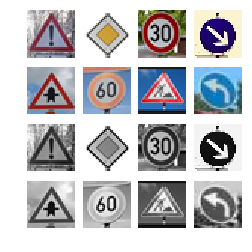

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import numpy as np
import matplotlib.image as mpimg


my_images = np.zeros((8, image_shape[0], image_shape[1], 1))
my_images_rgb = np.zeros((8, image_shape[0], image_shape[1], 3))

for i, img in enumerate(glob.glob('./my_traffic_signals/*.png')):
    image = mpimg.imread(img)

    my_images[i] = (np.expand_dims(np.dot(image[...,:3], [0.299, 0.587, 0.114]), axis=3) - 128) / 128
    my_images_rgb[i] = image[...,:3]
        

fig, axs = plt.subplots(4,4, figsize=(4, 4))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(my_images.shape[0]):
    axs[i].axis('off')
    axs[i].imshow(my_images_rgb[i])
for i in range(my_images.shape[0]):
    axs[i + 8].axis('off')
    axs[i + 8].imshow(my_images[i].squeeze(), cmap='gray')

print(my_images_rgb.shape)





### Predict the Sign Type for Each Image

### Question 6
_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

Answer:

Nothing in particular sticks out that I think would make classification difficult. My images appear to be more easily distinguishable than quite a few images from the original dataset. I noticed that my images tend to be quite a bit brighter and might occupy a different range in the color space, possibly a range that the model was not trained on. In addition, the GTSRB dataset states that the images "contain a border of 10 % around the actual traffic sign (at least 5 pixels) to allow for edge-based approaches" and the images that I used do not all include such a border. This could be another source of confusion for the model.

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

my_labels = [18, 12, 1, 38, 11, 3, 25, 34]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.125


### Analyze Performance

### Question 7
_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

NOTE: You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image.

Answer:
The model does not work as well as in the test dataset. The accuracy is 1 out of 8: 12.5%. The model tends to prefer the picture to be from category 18. I would like some pointers on the model's behaviour.



In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

my_labels = [18, 12, 1, 38, 11, 3, 25, 34]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.125


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[ 0.77481836,  0.10209167,  0.02641067,  0.02244113,  0.01751639],
       [ 0.71925002,  0.14854142,  0.02624771,  0.01955929,  0.01951637],
       [ 0.74805945,  0.12307158,  0.02686163,  0.02272377,  0.0160474 ],
       [ 0.70057136,  0.16827407,  0.02479074,  0.01799418,  0.01516574],
       [ 0.75786662,  0.12046383,  0.02985225,  0.02958921,  0.01296963],
       [ 0.69316119,  0.18408793,  0.02710033,  0.02482227,  0.014822  ],
       [ 0.73377478,  0.12375874,  0.02810519,  0.02753828,  0.01816999],
       [ 0.63580275,  0.24533118,  0.02574706,  0.02088614,  0.01392367]], dtype=float32), indices=array([[18,  3, 19, 25,  4],
       [18,  3, 19, 12, 25],
       [18,  3, 19, 25,  4],
       [18,  3, 19, 25,  5],
       [18,  3, 19, 25,  5],
       [18,  3, 19, 25, 12],
       [18,  3, 19, 25,  4],
       [18,  3, 19, 25, 12]], dtype=int32))


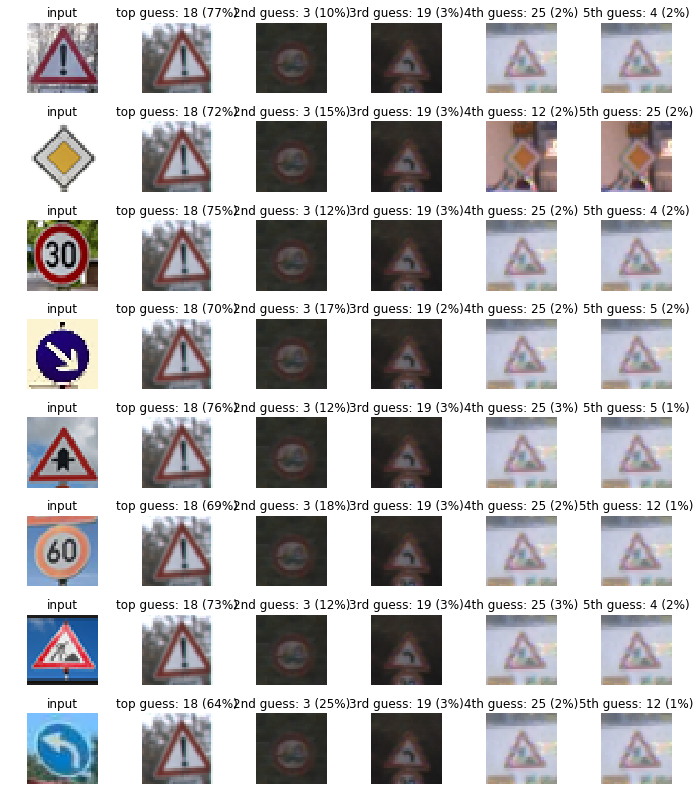

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_top_k = sess.run(top_k, feed_dict={x: my_images, keep_prob: 1.0})
    print(my_top_k)
    
    fig, axs = plt.subplots(len(my_images),6, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images_rgb):
        axs[6*i].axis('off')
        axs[6*i].imshow(image)
        axs[6*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_valid[index1].squeeze())
        axs[6*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_valid[index2].squeeze())
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_valid[index3].squeeze())
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_valid == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_valid[index4].squeeze())
        axs[6*i+4].set_title('4th guess: {} ({:.0f}%)'.format(guess4, 100*my_top_k[0][i][3]))
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_valid == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_valid[index4].squeeze())
        axs[6*i+5].set_title('5th guess: {} ({:.0f}%)'.format(guess5, 100*my_top_k[0][i][4]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./lenet


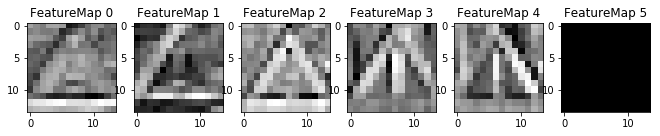

In [34]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, sess, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(my_images[0:1], layer1, sess)